In [299]:
!pip install linearmodels statsmodels

In [300]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

# Basic EDA

In [302]:
df = pd.read_csv('/content/drive/MyDrive/tips (data for regression problem).csv')

In [303]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [304]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [306]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [307]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [308]:
df.nunique()

,0
total_bill,229
tip,123
sex,2
smoker,2
day,4
time,2
size,6


# EDA by using plots

##Bar Plot and PieChart of days

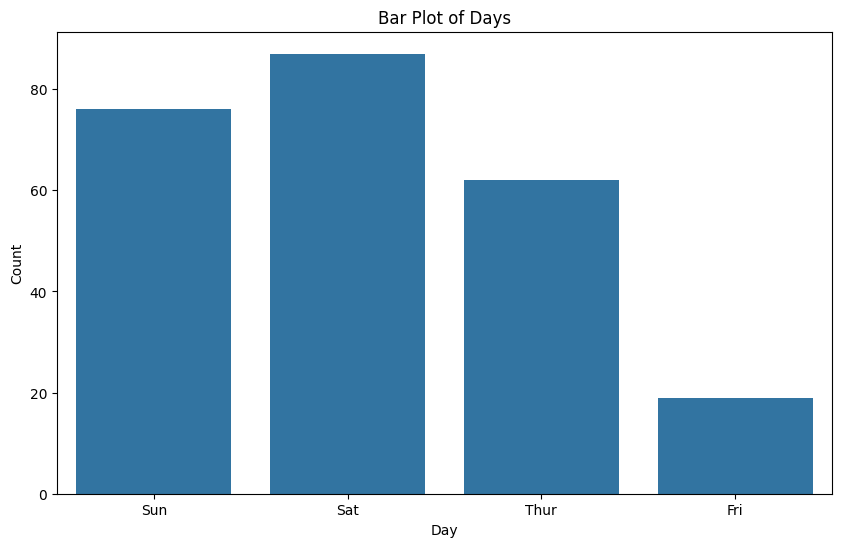

In [309]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=df)
plt.title('Bar Plot of Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

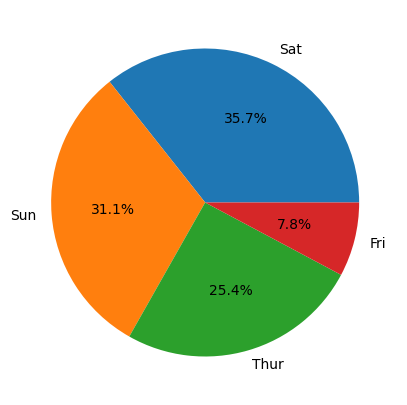

In [310]:
plt.figure(figsize = (10, 5))
plt.pie(df.day.value_counts(), autopct="%.1f%%", radius=1, labels=['Sat', 'Sun', 'Thur', 'Fri'])
plt.show()

In [311]:
a=df['total_bill']
mean=a.mean()
median=np.median(a)
mode=a.mode()

##kdeplot of TotalBill

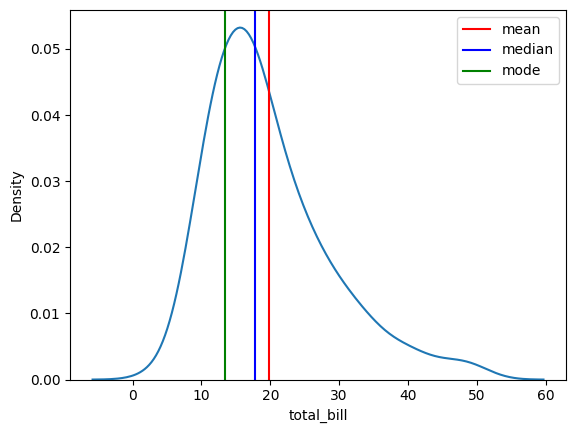

In [312]:
sns.kdeplot(a)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

## ScatterPlot of TotalBill vs Tip

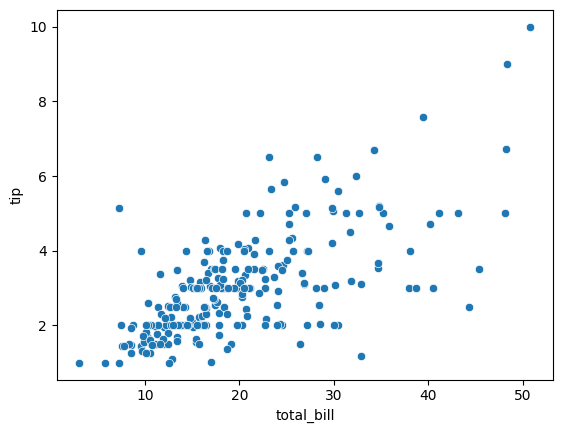

In [313]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

##Count Plot of sex with hue day

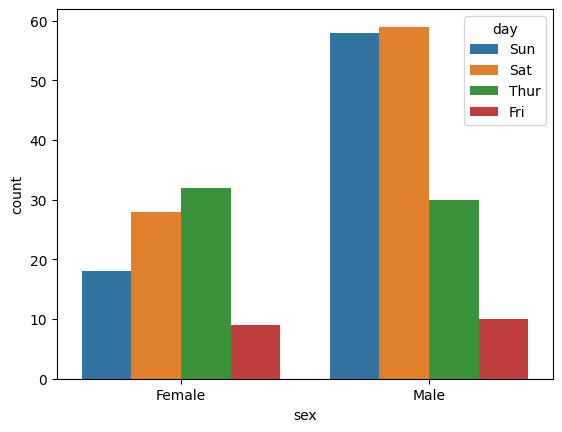

In [314]:
sns.countplot(x='sex',data=df,hue='day')
plt.show()

##CountPlot of day with hue sex

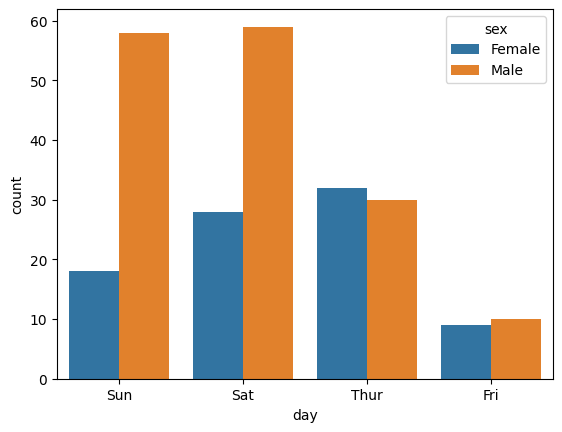

In [315]:
sns.countplot(x='day',data=df,hue='sex')
plt.show()

##CountPlot of size with heu sex

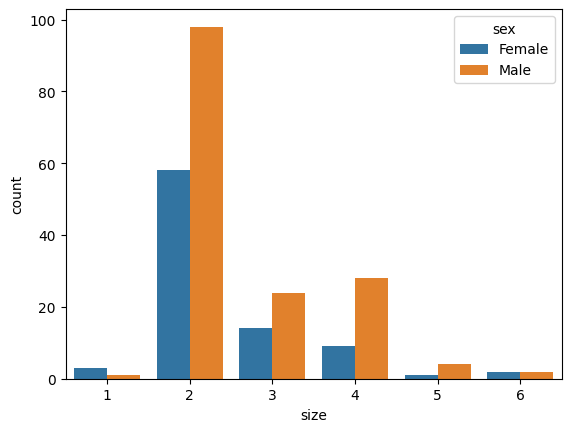

In [316]:
sns.countplot(x='size',data=df,hue='sex')
plt.show()

##ScatterPlot of TotalBill vs tip with hue day

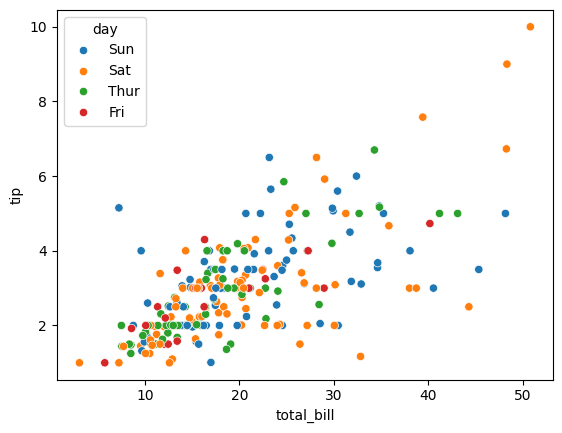

In [317]:
sns.scatterplot(x='total_bill',y='tip',data=df,hue='day')
plt.show()

##ScatterPlot of TotalBill vs tip with hue *sex*

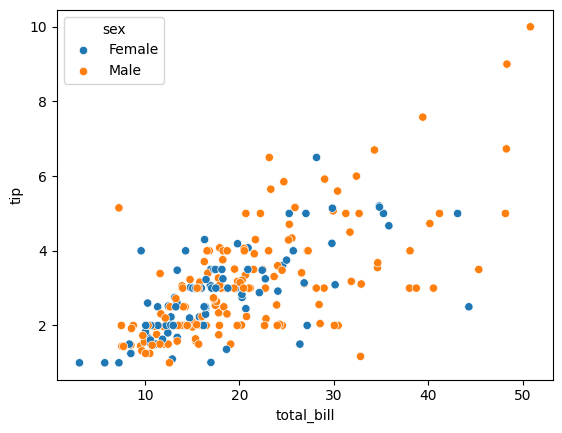

In [318]:
sns.scatterplot(x='total_bill',y='tip',data=df,hue='sex')
plt.show()

##ScatterPlot of TotalBill vs tip with row sex and column smoker

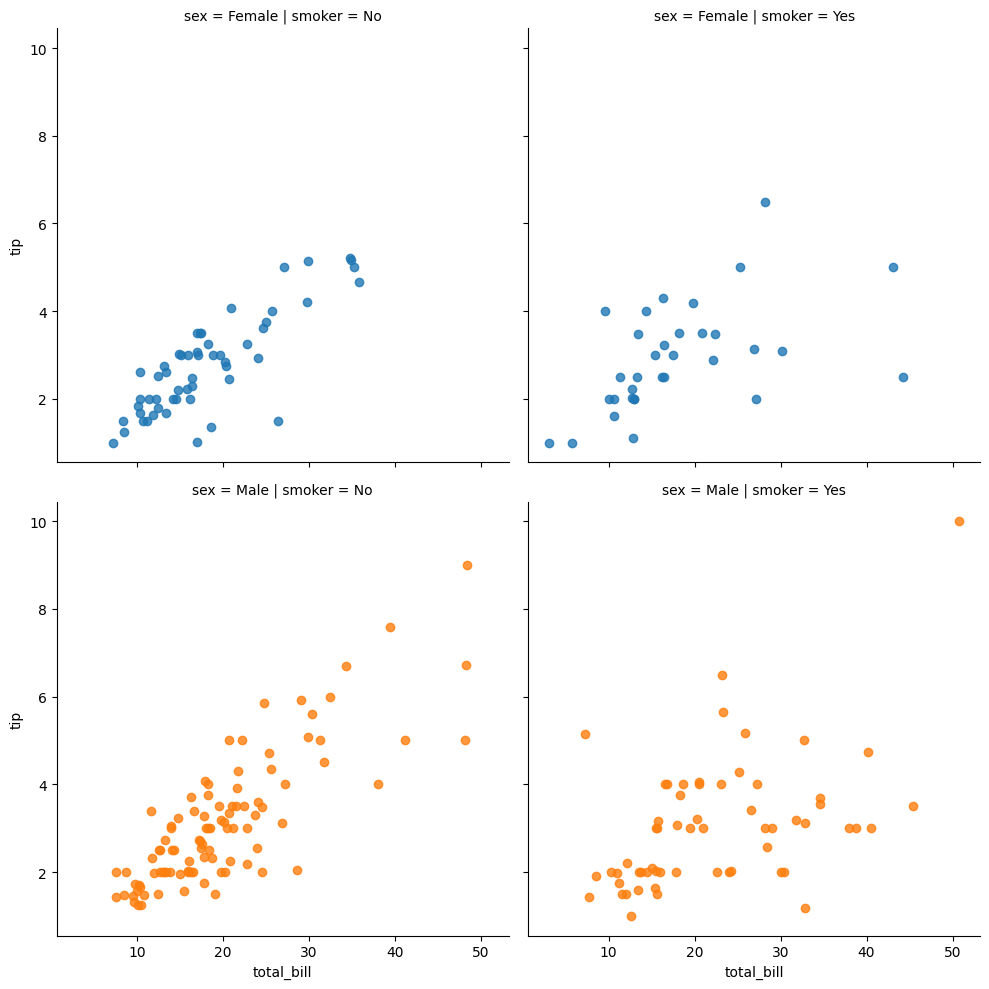

In [319]:
sns.lmplot(x='total_bill',y='tip',data=df,hue='sex',fit_reg=False,row='sex',col='smoker')
plt.show()

##Pair Plots

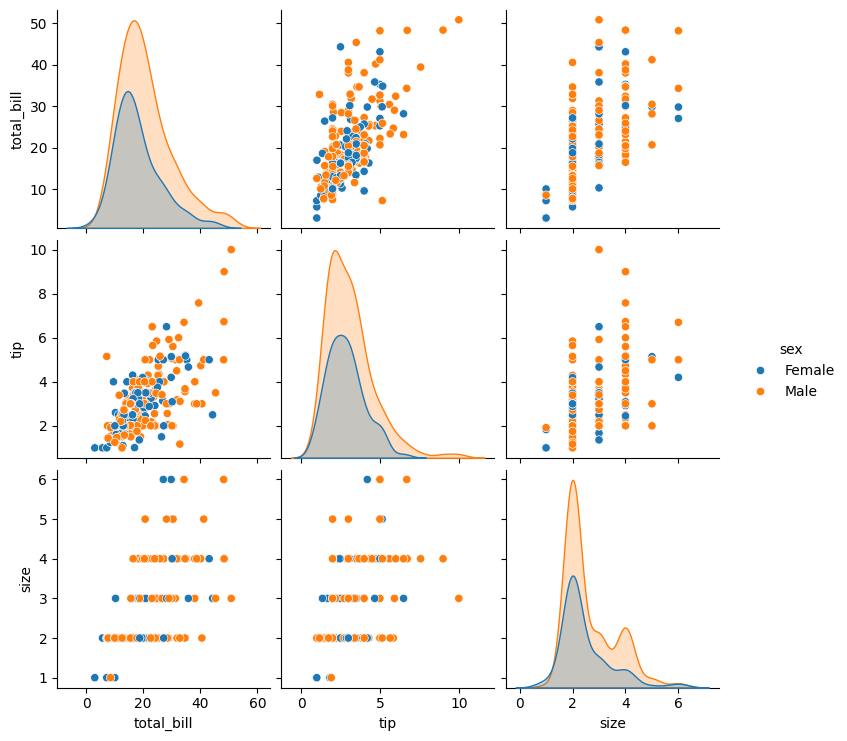

In [320]:
sns.pairplot(data=df,hue='sex')
plt.show()

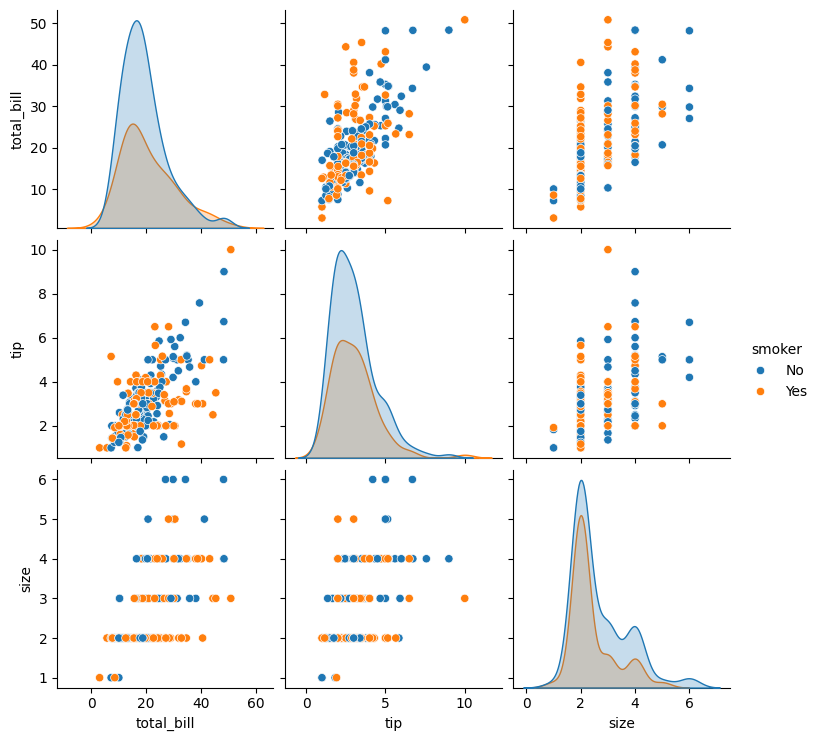

In [321]:
sns.pairplot(data=df,hue='smoker')
plt.show()

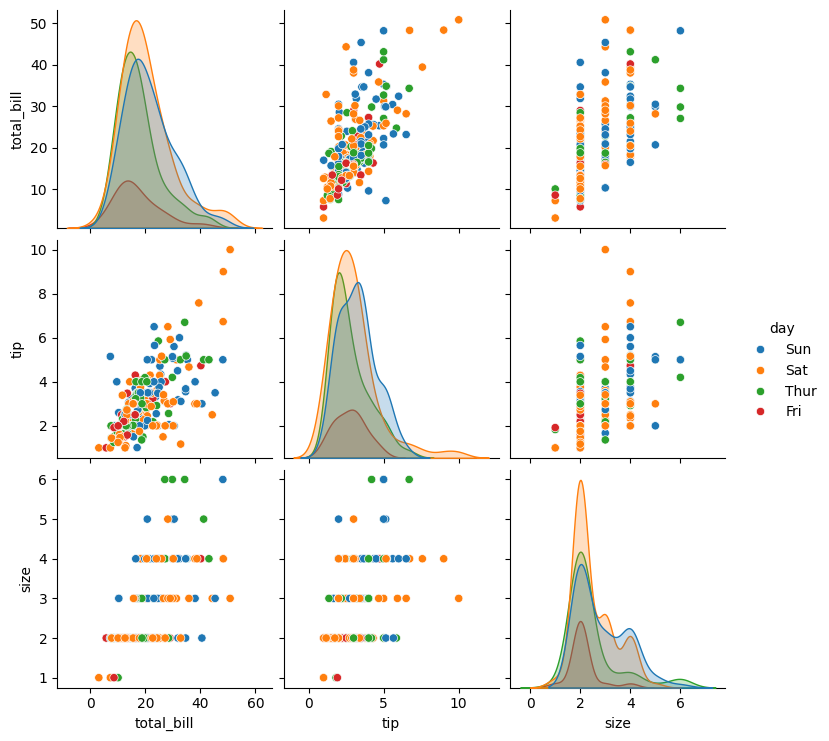

In [322]:
sns.pairplot(data=df,hue='day')
plt.show()

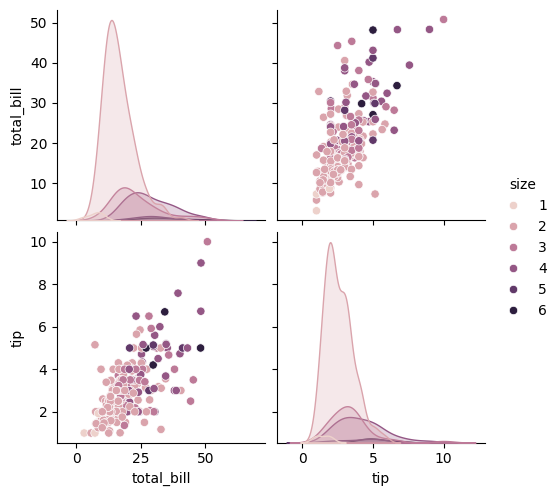

In [323]:
sns.pairplot(data=df,hue='size')
plt.show()

##BoxPlot

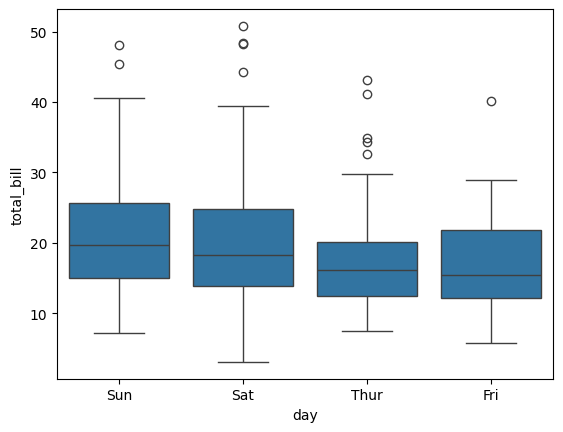

In [324]:
sns.boxplot(x='day',y='total_bill',data=df)
plt.show()

##StripPlot

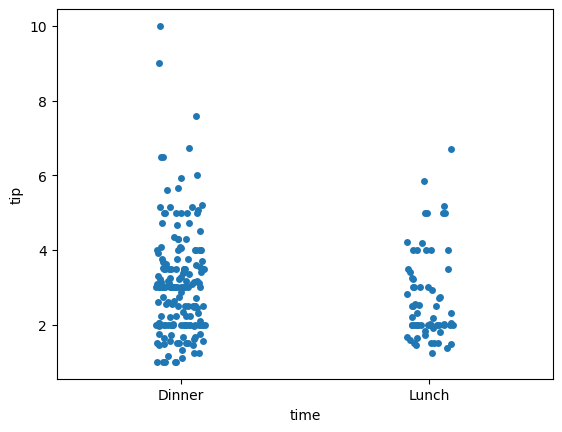

In [325]:
sns.stripplot(y = 'tip', x = 'time', data = df)
plt.show()

##LinePlots

<Axes: xlabel='total_bill', ylabel='tip'>

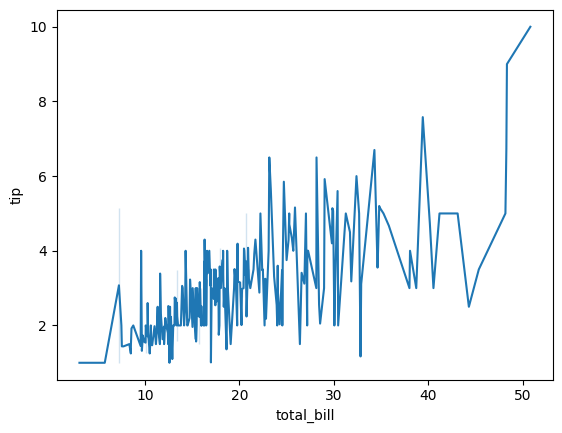

In [326]:
sns.lineplot(x='total_bill', y='tip', data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

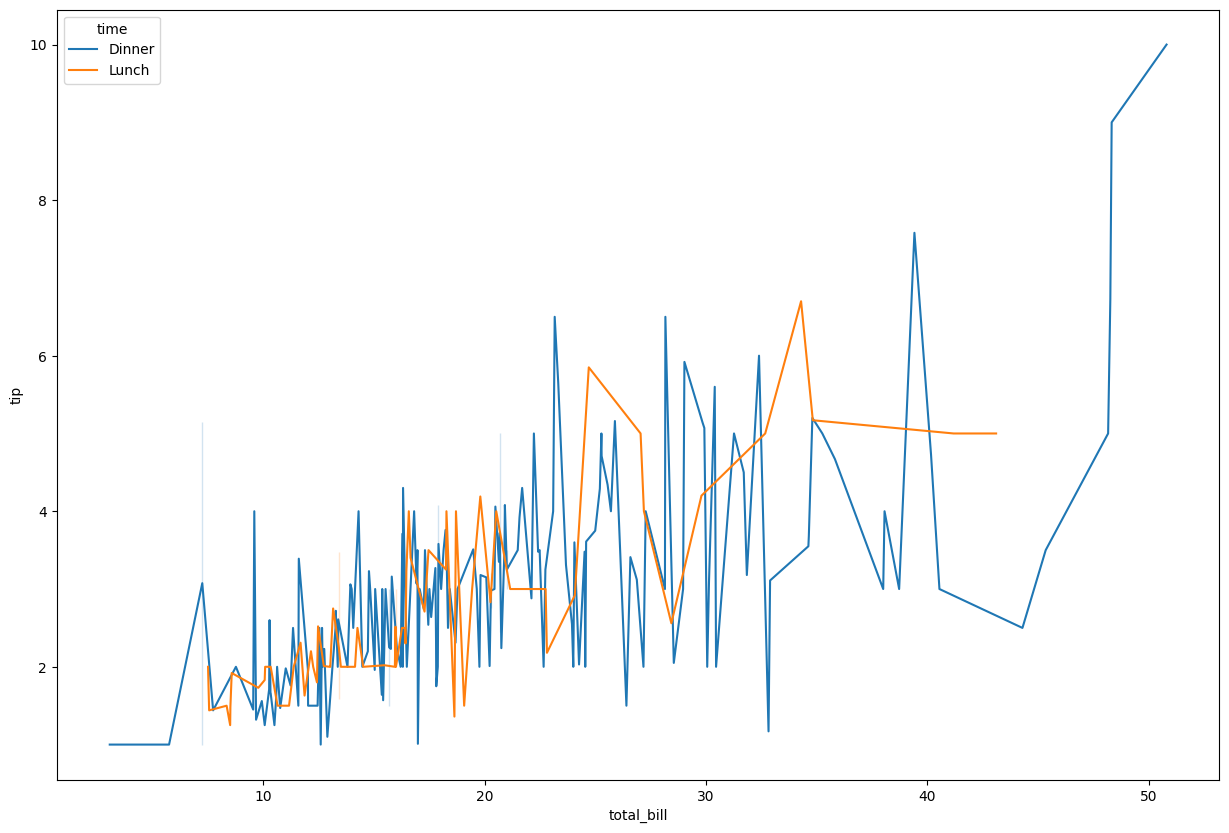

In [327]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="total_bill", y="tip",hue="time",markers=True, dashes=False, data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

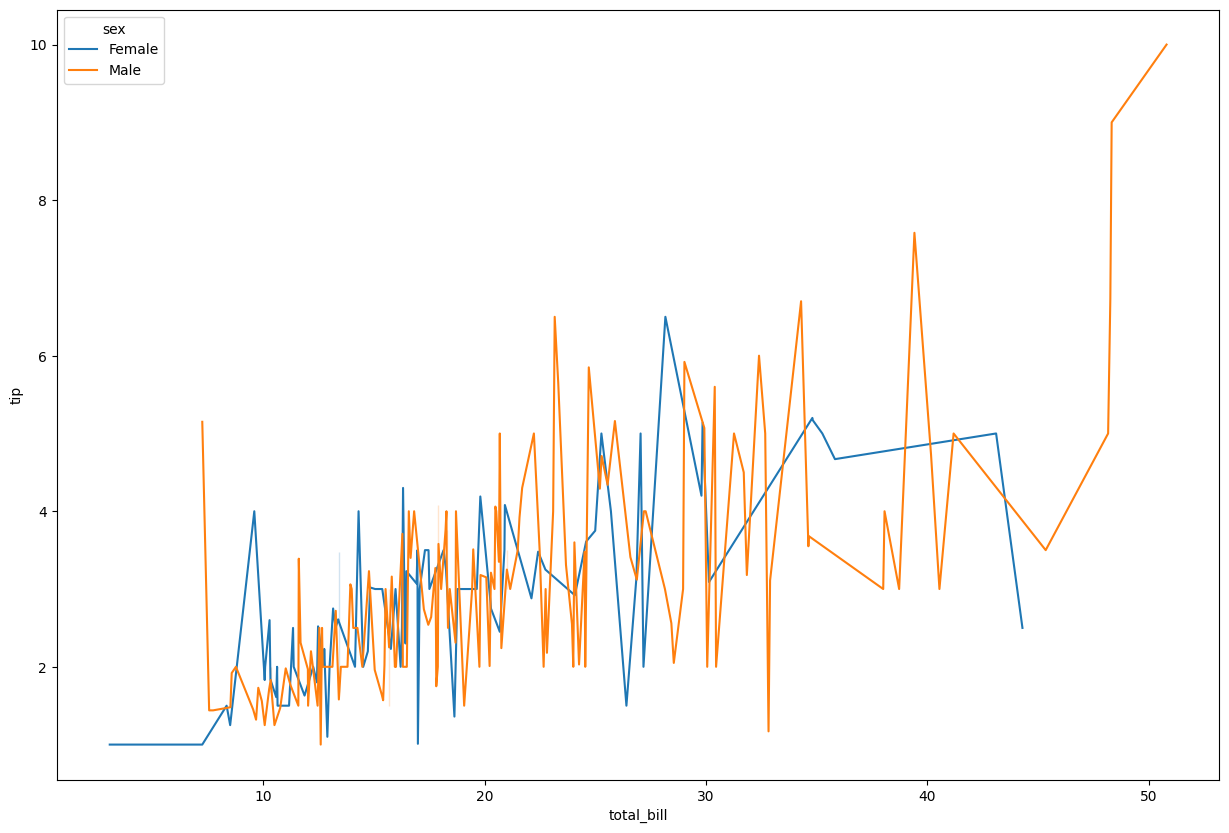

In [328]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="total_bill", y="tip",hue="sex", markers=True, dashes=False, data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

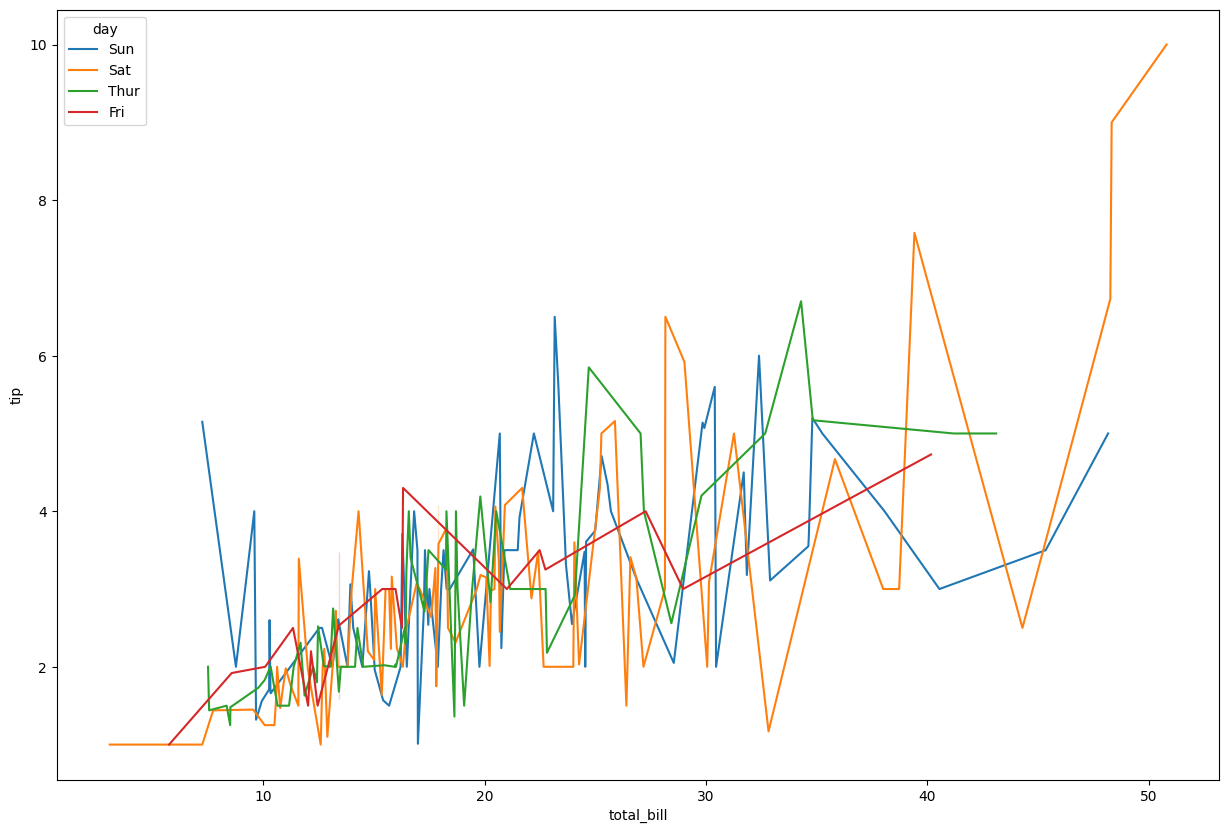

In [329]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="total_bill", y="tip",hue="day", markers=True, dashes=False, data=df)

##KDE Plots

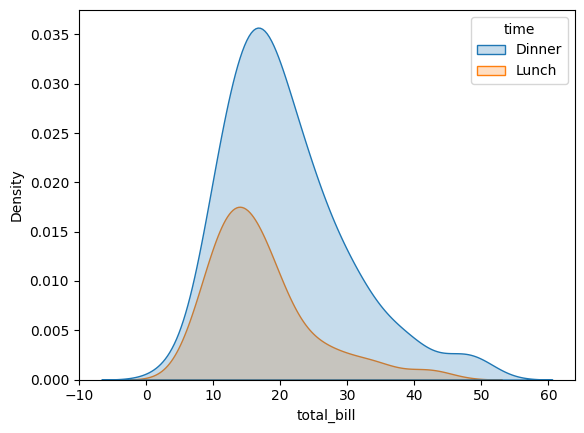

In [330]:
sns.kdeplot(data=df, x='total_bill', hue='time', fill=True)
plt.show()

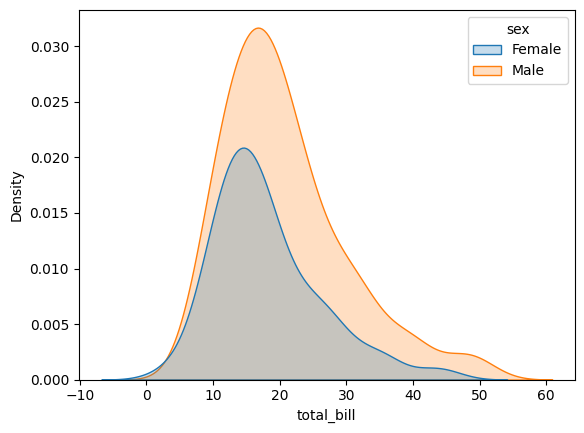

In [331]:
sns.kdeplot(data=df, x='total_bill', hue='sex', fill=True)
plt.show()

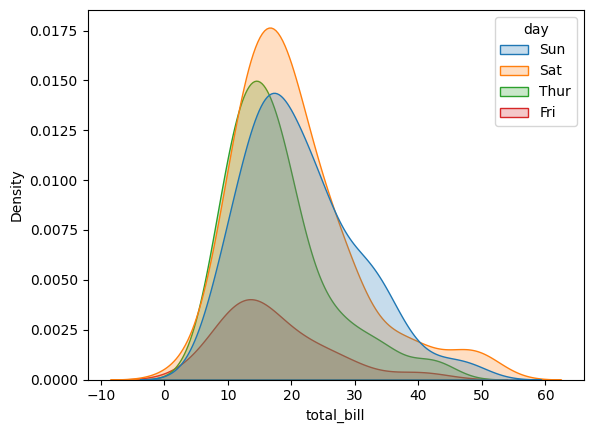

In [332]:
sns.kdeplot(data=df, x='total_bill', hue='day', fill=True)
plt.show()

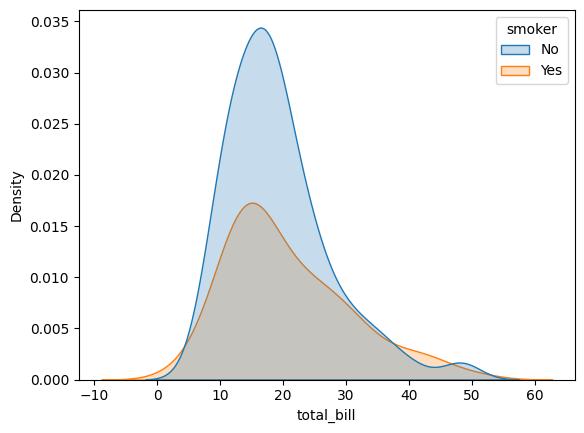

In [333]:
sns.kdeplot(data=df, x='total_bill', hue='smoker', fill=True)
plt.show()

Plot of TotalBill Amount vs Tip Amount

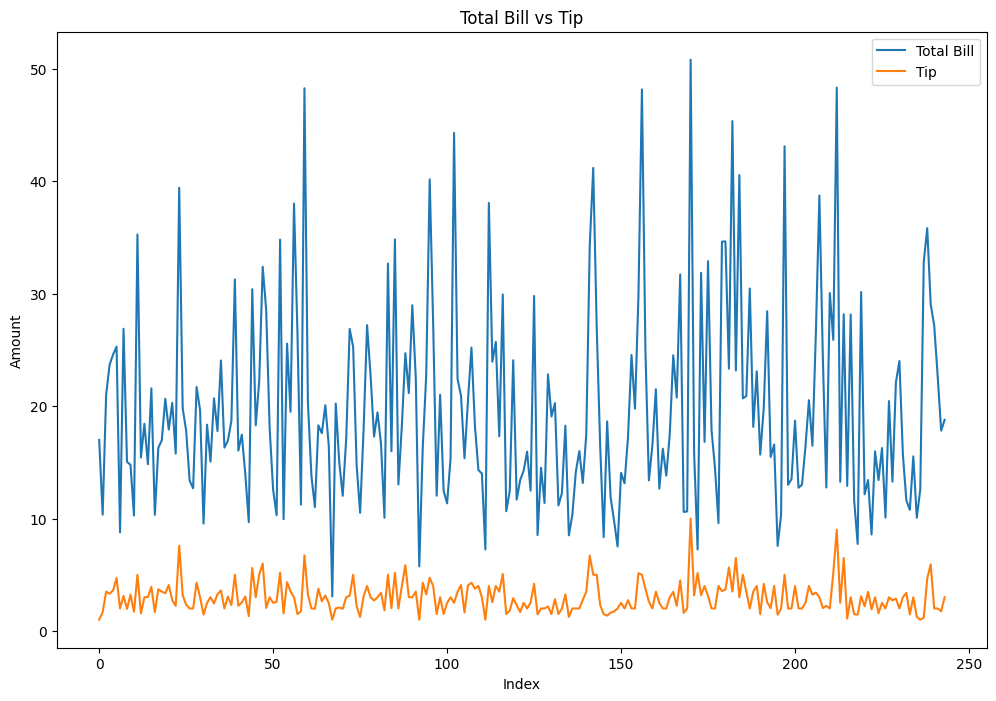

In [334]:
x = df['total_bill']
y = df['tip']
plt.figure(figsize=(12, 8))
plt.plot(x, label='Total Bill')
plt.plot(y, label='Tip')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Total Bill vs Tip')
plt.legend()
plt.show()

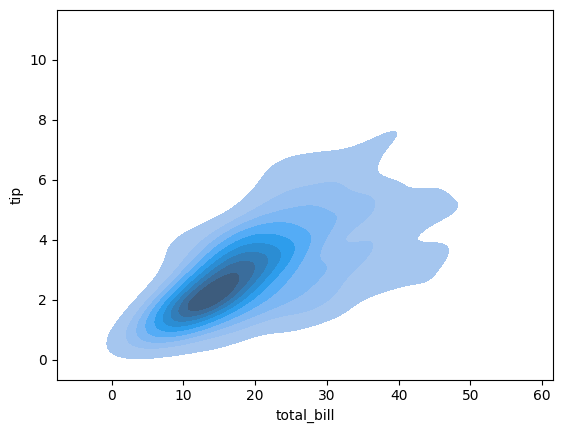

In [335]:
sns.kdeplot(data=df, x='total_bill', y='tip', fill=True)
plt.show()

##Heat Map

<Axes: >

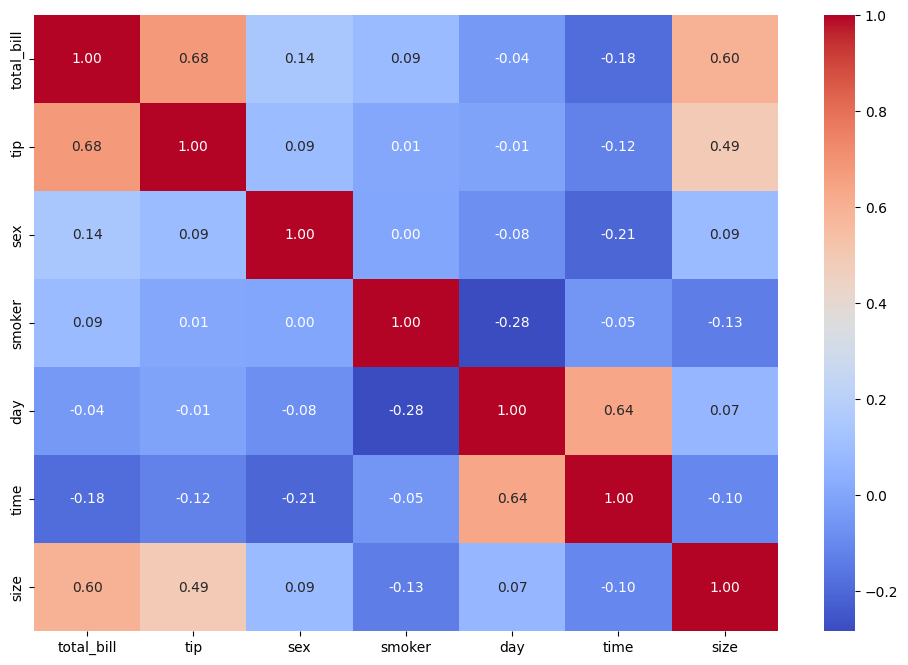

In [336]:
df1=df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df1.columns:
    if df1[column].dtype == object:
        df1[column] = le.fit_transform(df1[column])
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

## Removing Outliers

In [337]:
# Q1 = df['total_bill'].quantile(0.25)
# Q3 = df['total_bill'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = df[(df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)]

# df_no_outliers = df[(df['total_bill'] >= lower_bound) & (df['total_bill'] <= upper_bound)]

# print(f"Number of outliers removed: {len(outliers)}")

#Linearity Test

In [338]:
from sklearn.preprocessing import MinMaxScaler
dfxx = df[['total_bill']].copy()
scaler = MinMaxScaler()
dfxx_scaled = scaler.fit_transform(dfxx)
dfxx_scaled = pd.DataFrame(dfxx_scaled, columns=['total_bill'])
print(dfxx_scaled.head())

   total_bill
0    0.291579
1    0.152283
2    0.375786
3    0.431713
4    0.450775


In [339]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

XX = sm.add_constant(dfxx_scaled['total_bill'])
yy = df_joined['tip']

model = sm.OLS(yy, XX).fit()

rainbow_statistic, rainbow_p_value = linear_rainbow(model)

print("Rainbow Statistic:", rainbow_statistic)
print("P-Value:", rainbow_p_value)

if rainbow_p_value < 0.05:
    print("The model does not satisfy linearity (reject null hypothesis).")
else:
    print("The model satisfies linearity (fail to reject null hypothesis).")

Rainbow Statistic: 1.2291480226129026
P-Value: 0.1291192152551375
The model satisfies linearity (fail to reject null hypothesis).


# Models

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [341]:
df_to_scale = df['total_bill']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_to_scale.values.reshape(-1, 1))
df_scaled = pd.DataFrame(scaled_data, columns=['total_bill'])
print(df_scaled.head())

   total_bill
0    0.291579
1    0.152283
2    0.375786
3    0.431713
4    0.450775


In [342]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].map({'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,4,1,2
1,10.34,1.66,0,0,4,1,3
2,21.01,3.50,0,0,4,1,3
3,23.68,3.31,0,0,4,1,2
4,24.59,3.61,1,0,4,1,4


In [343]:
df_models = df.copy()
df_models.drop('total_bill', axis=1, inplace=True)

In [344]:
df_models.head()

,tip,sex,smoker,day,time,size
0,1.01,1,0,4,1,2
1,1.66,0,0,4,1,3
2,3.50,0,0,4,1,3
3,3.31,0,0,4,1,2
4,3.61,1,0,4,1,4


In [345]:
df_joined = pd.concat([df_models, df_scaled], axis=1)
print(df_joined.head())

    tip  sex  smoker  day  time  size  total_bill
0  1.01    1       0    4     1     2    0.291579
1  1.66    0       0    4     1     3    0.152283
2  3.50    0       0    4     1     3    0.375786
3  3.31    0       0    4     1     2    0.431713
4  3.61    1       0    4     1     4    0.450775


In [346]:
X = df_joined.drop('tip', axis=1)
y = df_joined['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [347]:
#LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.9554053005369075
R-squared: 0.5666185536619717


In [348]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R-squared: {r2_ridge}')

Ridge Regression - Mean Squared Error: 1.0111982983412098
Ridge Regression - R-squared: 0.5413102891271457


In [349]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression - R-squared: {r2_lasso}')

Lasso Regression - Mean Squared Error: 2.268376608622147
Lasso Regression - R-squared: -0.028958427309919932


In [350]:
#Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Decision Tree Regression - Mean Squared Error: {mse_tree}')
print(f'Decision Tree Regression - R-squared: {r2_tree}')

Decision Tree Regression - Mean Squared Error: 1.2894775510204082
Decision Tree Regression - R-squared: 0.41508002334967653


In [351]:
# RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression - R-squared: {r2_rf}')

Random Forest Regression - Mean Squared Error: 0.7909833348979588
Random Forest Regression - R-squared: 0.6412020097494613


In [352]:
#SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f'SVM Regression - Mean Squared Error: {mse_svm}')
print(f'SVM Regression - R-squared: {r2_svm}')

SVM Regression - Mean Squared Error: 0.9761074282003322
SVM Regression - R-squared: 0.5572278604933159


In [353]:
# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'KNN Regression - Mean Squared Error: {mse_knn}')
print(f'KNN Regression - R-squared: {r2_knn}')

KNN Regression - Mean Squared Error: 1.564242285714286
KNN Regression - R-squared: 0.290443978251958


In [354]:
report_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression', 'Random Forest Regression', 'SVM Regression', 'KNN Regression'],
    'Mean Squared Error': [mse, mse_ridge, mse_lasso, mse_tree, mse_rf, mse_svm, mse_knn],
    'R-squared': [r2, r2_ridge, r2_lasso, r2_tree, r2_rf, r2_svm, r2_knn]
}

report_df = pd.DataFrame(report_data)
report_df

,Model,Mean Squared Error,R-squared
0,Linear Regression,0.955405,0.566619
1,Ridge Regression,1.011198,0.541310
2,Lasso Regression,2.268377,-0.028958
3,Decision Tree Regression,1.289478,0.415080
4,Random Forest Regression,0.790983,0.641202
5,SVM Regression,0.976107,0.557228
6,KNN Regression,1.564242,0.290444


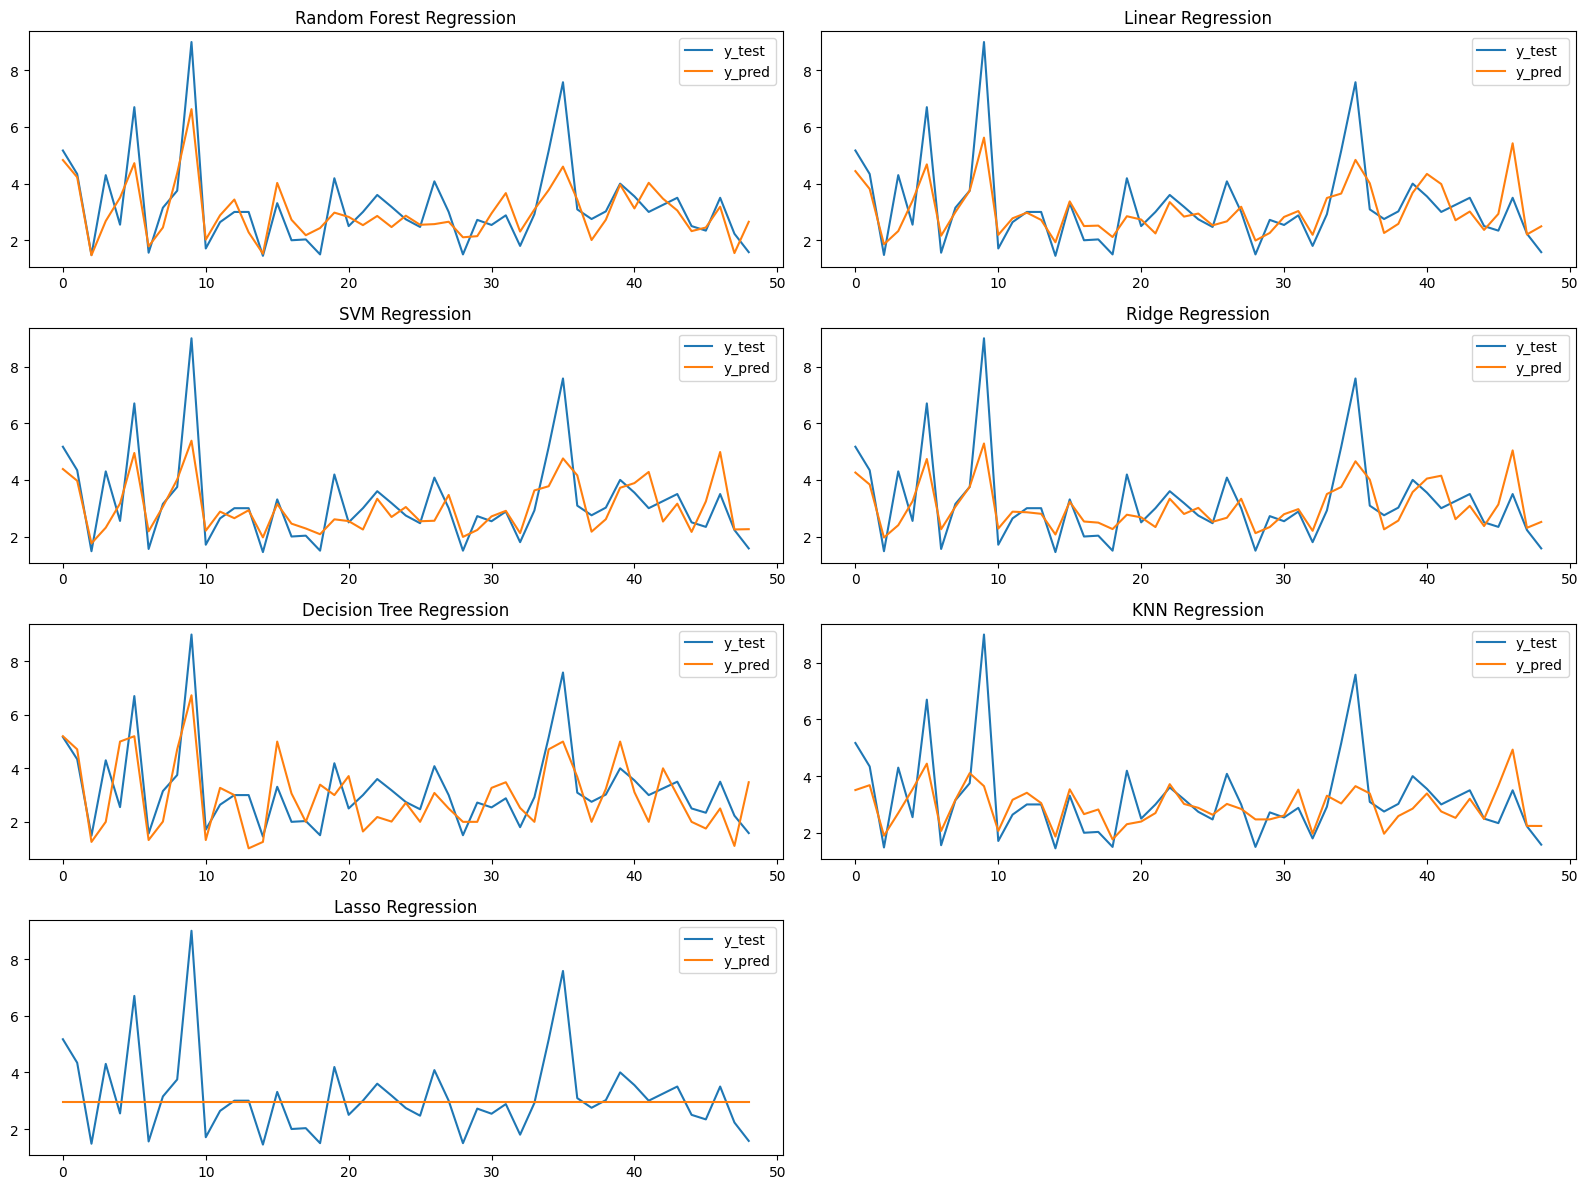

In [355]:
models = [
    (y_pred, 'Linear Regression'),
    (y_pred_ridge, 'Ridge Regression'),
    (y_pred_lasso, 'Lasso Regression'),
    (y_pred_tree, 'Decision Tree Regression'),
    (y_pred_rf, 'Random Forest Regression'),
    (y_pred_svm, 'SVM Regression'),
    (y_pred_knn, 'KNN Regression')
]
models.sort(key=lambda x: r2_score(y_test, x[0]), reverse=True)
plt.figure(figsize=(16,12))
for i, (y_pred_model, model_name) in enumerate(models):
    plt.subplot(4, 2, i + 1)
    plt.plot(y_test.values, label='y_test')
    plt.plot(y_pred_model, label='y_pred')
    plt.title(model_name)
    plt.legend()

plt.tight_layout()
plt.show()